# Teil 11 - Reguläre Ausdrücke
reguläre Ausdrücke (engl.: regular expressions, Abkürzung: RE oder regex)
Sie sind zwar sehr mächtig, aber auch etwas kompliziert und ihre Syntax etwas gewöhnungsbedürftig ist.<br>

## Aus dem Lehrbrief-Systemsoftware
Das Ziel beim Einsatz regulärer Ausdrücke ist, ein Suchmuster zu beschreiben, ähnlich wie bei den Wildcard-Zeichen (?, \*) für Dateinamen, aber leistungsfähiger.<br>
- Zunächst ist jedes Zeichen, das kein Sonderzeichen ist, eine RE
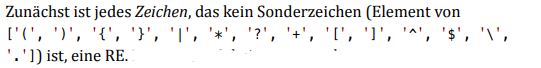
    Denken Sie dabei immer an die Verwendung als Suchmuster: Wenn Sie eine Textdatei mit einer Liste von Personennamen durchsuchen, können Sie als Suchkriterium z. B. a verwenden, und dann finden Sie alle Zeilen, in denen (an beliebiger Position) mindestens ein a vorkommt.<br>


In [5]:
# https://docs.python.org/3/library/re.html 
import re
hand = open('mbox-short.txt')
help(re.search)
for line in hand:
    line = line.rstrip()

    if re.search('From:', line):
        print(line)

hand.close()


Help on function search in module re:

search(pattern, string, flags=0)
    Scan through string looking for a match to the pattern, returning
    a Match object, or None if no match was found.

From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: zqian@umich.edu
From: rjlowe@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: gsilver@umich.edu
From: gsilver@umich.edu
From: zqian@umich.edu
From: gsilver@umich.edu
From: wagnermr@iupui.edu
From: zqian@umich.edu
From: antranig@caret.cam.ac.uk
From: gopal.ramasammycook@gmail.com
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za
From: louis@media.berkeley.edu
From: louis@media.berkeley.edu
From: ray@media.berkeley.edu
From: cwen@iupui.edu
From: cwen@iupui.edu
From: cwen@iupui.edu


Alternativen: mit | getrennt
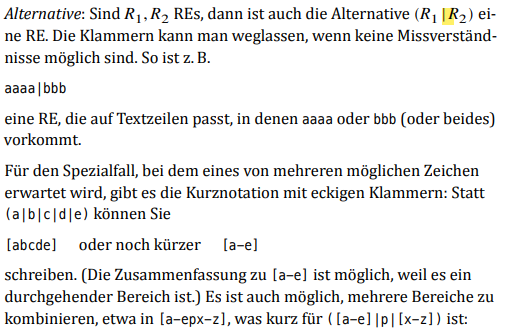

## Wildcards Sonderzeichen 



- Zeilenanfang und -ende: Um gezielt am Anfang oder Ende einer Textzeile suchen zu können, verwenden Sie die Zeichen \^ und ein \$$ . <br> 
    So passt dann Anfang und Ende nur auf Zeilen, die exakt eines der drei Worte Wert, Wirt und Wort enthalten.<br>
    ^W[eio]rt\$
- [^ Alles außer: 
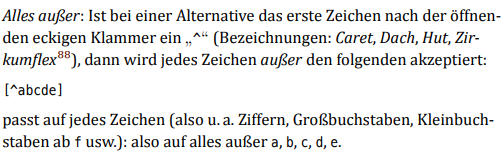
- k-fache Wiederholung mit {k} mit k 0-9 
    Für eine fünfstellige Zahl z.B. Postleitzahl [0-9]{5}
    Es ist auch möglich, zu fordern, dass die RE 𝑘 bis 𝑚 mal vorkommt:<br>
    Das geht mit der Schreibweise {k,m} z.B. [0-9]{2,4} für eine zwei- bis vierstellige Zahl.<br>
- Beliebiges Zeichen: Ein vollständig beliebiges Zeichen wird durch einen einfachen Punk . erkannt.<br>
- beliebige Wiederholung<br>
    - mit dem + kombiniert  ein oder mehr der Zeichen<br>
    - mit dem \* kombiniert  null oder mehr Zeichen<br>
- Null-oder-Eins-Operator ? {0,1}, und (𝑅)? 𝑅 darf vorkommen, muss es aber nicht. z.B. Schiff(f)?ahrt<br>

In [6]:
# https://docs.python.org/3/library/re.html 
import re
hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()

    if re.search('^From:.+@.+za', line):
        print(line)
hand.close()


From: stephen.marquard@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: david.horwitz@uct.ac.za
From: stephen.marquard@uct.ac.za


Wenn wir in Python Daten aus einer Zeichenkette extrahieren wollen, können wir die Methode findall() verwenden, um alle Teilstrings zu extrahieren, die einem
regulären Ausdruck entsprechen.

- Escapezeichen<br>
siehe<br>
https://learn.microsoft.com/de-de/dotnet/standard/base-types/regular-expression-language-quick-reference<br>
\s Entspricht jedem Leerzeichen.<br>
\S Entspricht einem Nicht-Leerzeichen.<br>
\d Entspricht einer dezimalen Ziffer.<br>
\D Entspricht einem anderen Zeichen als einer Dezimalzahl.<br>
\w Entspricht einem beliebigen Wortzeichen.<br>
\W Entspricht jedem Nicht-Wort-Zeichen.<br>


In [7]:
import re

hand = open('mbox.txt')
x=list()
AnzahlEmails=0
for line in hand:
    line = line.rstrip()
# Zähle alle E-Mail Adressen Zeichen@Zeichen.Domain aber auch  ZeichenUndZiffern.ZeichenUndZiffern@Zeichen.Domain
    RegEx='[a-zA-Z0-9\.]*@[a-zA-Z\.]*\.[a-z]{2,3}'            # Anzahl der Treffer des RegEx 20140
    
# Finde Zeilen, mit einem at-Zeichen zwischen zwei Zeichen. Die
# Zeichenfolge vor dem at muss mit einem Buchstaben oder einer
# Ziffer beginnen; die Zeichenfolge nach dem at muss mit einem
# Buchstaben enden.
# Trifft aber auch zeilen mit Falschen E-Mail-Adressen

    # RegEx='[a-zA-Z0-9]\S*@\S*[a-zA-Z]'                       # Anzahl der Treffer des RegEx 22009
    EmailAdresseList = re.findall(RegEx, line)
    if len(EmailAdresseList) > 0:
        # print(EmailAdresseList)
        AnzahlEmails += 1 

print('Anzahl der Treffer des RegEx',AnzahlEmails)
hand.close()



Anzahl der Treffer des RegEx 20140


In [8]:
# Finde Zeilen, die mit 'X' beginnen, gefolgt von beliebig vielen
# (nicht-Leer-)Zeichen, gefolgt von einem ':' und einem
# Leerzeichen. Danach kann eine Zahl mit einer oder mehreren
# Ziffern und Dezimalpunkten folgen.
import re
hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^X\S*: [0-9.]+', line):
        print(line,end='||')

X-DSPAM-Confidence: 0.8475||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.6178||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.6961||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7565||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7626||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7556||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7002||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7615||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7601||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7605||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.6959||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7606||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7559||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7605||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.6932||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.7558||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.6526||X-DSPAM-Probability: 0.0000||X-DSPAM-Confidence: 0.6948||X-D

In [9]:
# Finde Zeilen, die mit 'X' beginnen, gefolgt von beliebig vielen
# (nicht-Leer-)Zeichen, gefolgt von einem ':' und einem
# Leerzeichen. Danach kann eine Zahl mit einer oder mehreren
# Ziffern und Dezimalpunkten folgen. Diese Zahl ist dann der Match.

import re
hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    x = re.findall('^X\S*: ([0-9.]+)', line)       # findall nur das in  ()  wird zurück gegeben 
    if len(x) > 0:
        print(x,end='')

['0.8475']['0.0000']['0.6178']['0.0000']['0.6961']['0.0000']['0.7565']['0.0000']['0.7626']['0.0000']['0.7556']['0.0000']['0.7002']['0.0000']['0.7615']['0.0000']['0.7601']['0.0000']['0.7605']['0.0000']['0.6959']['0.0000']['0.7606']['0.0000']['0.7559']['0.0000']['0.7605']['0.0000']['0.6932']['0.0000']['0.7558']['0.0000']['0.6526']['0.0000']['0.6948']['0.0000']['0.6528']['0.0000']['0.7002']['0.0000']['0.7554']['0.0000']['0.6956']['0.0000']['0.6959']['0.0000']['0.7556']['0.0000']['0.9846']['0.0000']['0.8509']['0.0000']['0.9907']['0.0000']